In [1]:
from sklearn.datasets import make_blobs
import numpy as np
np.random.seed(1000)
nb_samples = 3000
X, _ = make_blobs(n_samples=nb_samples, n_features=2, centers=8, cluster_std=2.0)


In [2]:
from sklearn.cluster import AgglomerativeClustering
# complete linkage
ac = AgglomerativeClustering(n_clusters=8, linkage='complete')
Y = ac.fit_predict(X)


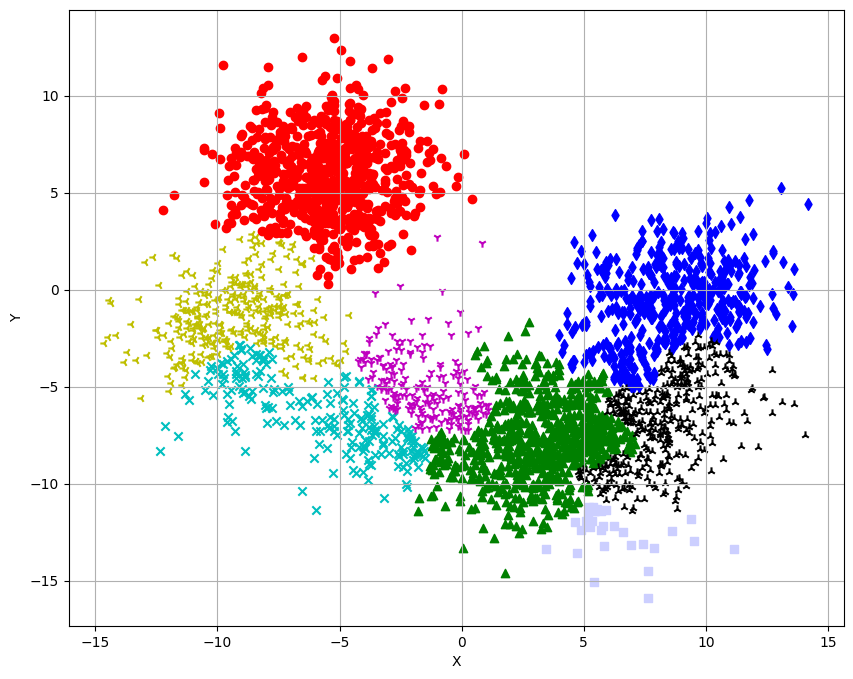

In [10]:
import matplotlib.pyplot as plt
def plot_clustered_dataset(X, Y):
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    ax.grid()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    markers = ['o', 'd', '^', 'x', '1', '2', '3', 's']
    colors = ['r', 'b', 'g', 'c', 'm', 'k', 'y', '#cccfff']
    for i in range(nb_samples):
        ax.scatter(X[i, 0], X[i, 1], marker=markers[Y[i]], color=colors[Y[i]])
    plt.show()
# Plot the clustered dataset
plot_clustered_dataset(X, Y)

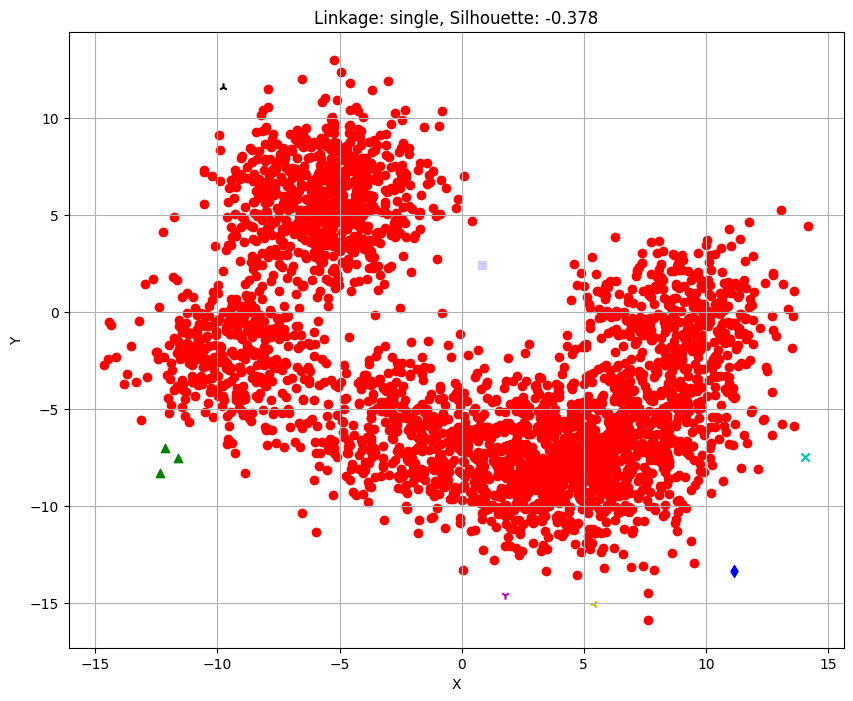

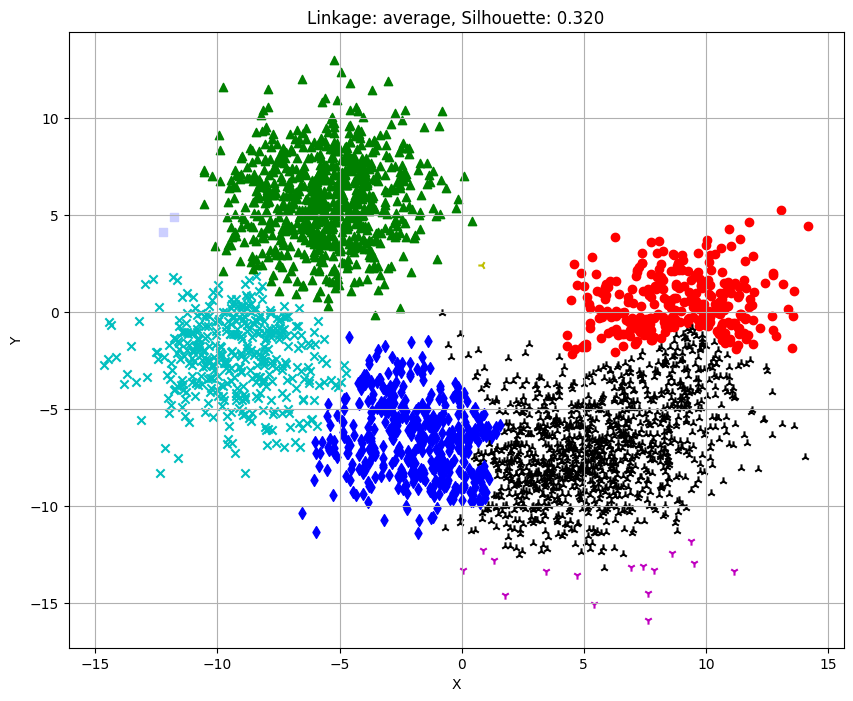

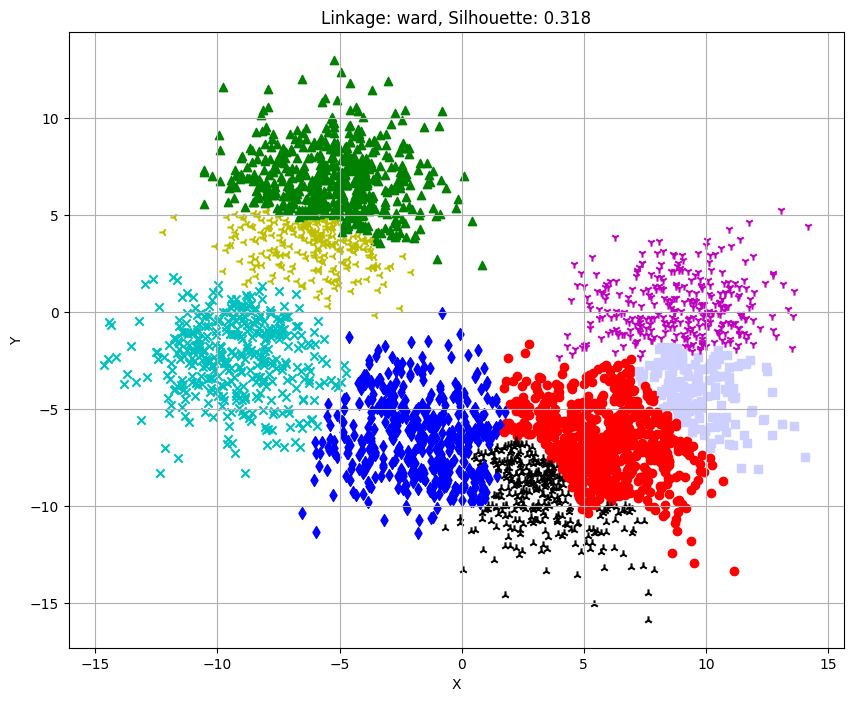

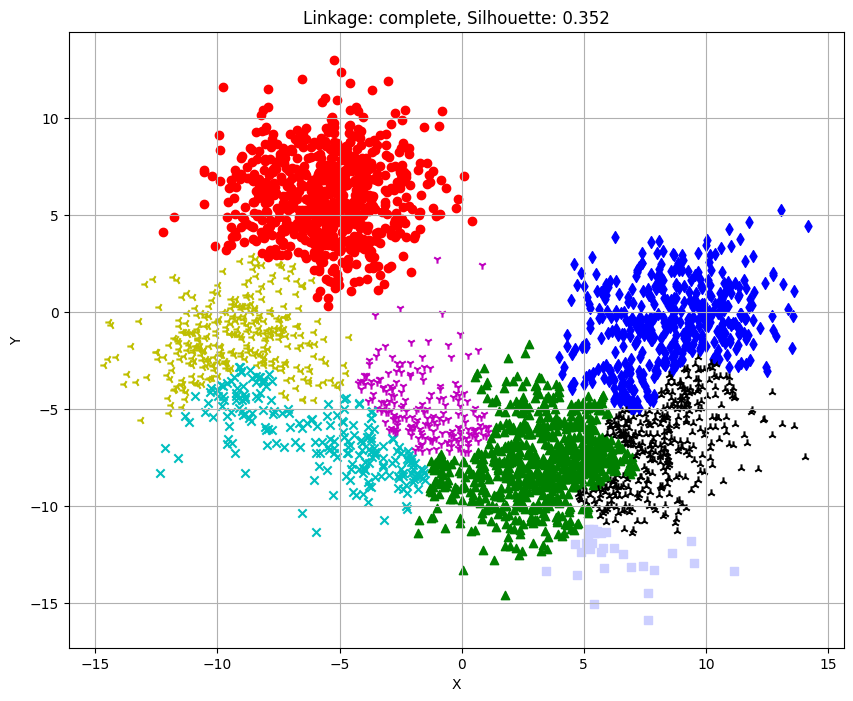

Silhouette Scores for different linkages:
single: -0.378
average: 0.320
ward: 0.318
complete: 0.352


In [11]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# Generate the dataset
np.random.seed(1000)
nb_samples = 3000
X, _ = make_blobs(n_samples=nb_samples, n_features=2, centers=8, cluster_std=2.0)

# Define linkages to compare
linkages = ['single', 'average', 'ward','complete']

# Function to evaluate and plot clusters
def evaluate_linkage(X, linkages):
    scores = {}
    for linkage in linkages:
        ac = AgglomerativeClustering(n_clusters=8, linkage=linkage)
        Y = ac.fit_predict(X)
        score = silhouette_score(X, Y)
        scores[linkage] = score

        # Plot clustered dataset
        plot_clustered_dataset(X, Y, title=f'Linkage: {linkage}, Silhouette: {score:.3f}')

    return scores

def plot_clustered_dataset(X, Y, title=""):
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    ax.grid()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    markers = ['o', 'd', '^', 'x', '1', '2', '3', 's']
    colors = ['r', 'b', 'g', 'c', 'm', 'k', 'y', '#cccfff']
    for i in range(nb_samples):
        ax.scatter(X[i, 0], X[i, 1], marker=markers[Y[i] % len(markers)], color=colors[Y[i] % len(colors)])
    ax.set_title(title)
    plt.show()

# Evaluate linkages
scores = evaluate_linkage(X, linkages)

# Print the results
print("Silhouette Scores for different linkages:")
for linkage, score in scores.items():
    print(f"{linkage}: {score:.3f}")


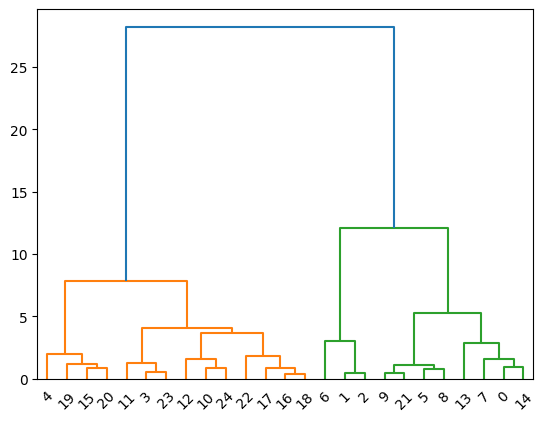

In [12]:
from sklearn.datasets import make_blobs
import numpy as np
np.random.seed(1000)
nb_samples = 25
X, Y = make_blobs(n_samples=nb_samples, n_features=2, centers=3, cluster_std=1.5)
from scipy.spatial.distance import pdist
Xdist = pdist(X, metric='euclidean')
from scipy.cluster.hierarchy import linkage
Xl = linkage(Xdist, method='ward')
from scipy.cluster.hierarchy import dendrogram
Xd = dendrogram(Xl)
